In [6]:
# Importing naumpy and pandas libraries to read the data
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("https://raw.githubusercontent.com/Kaushik-Varma/linear_regression_model_python/main/Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


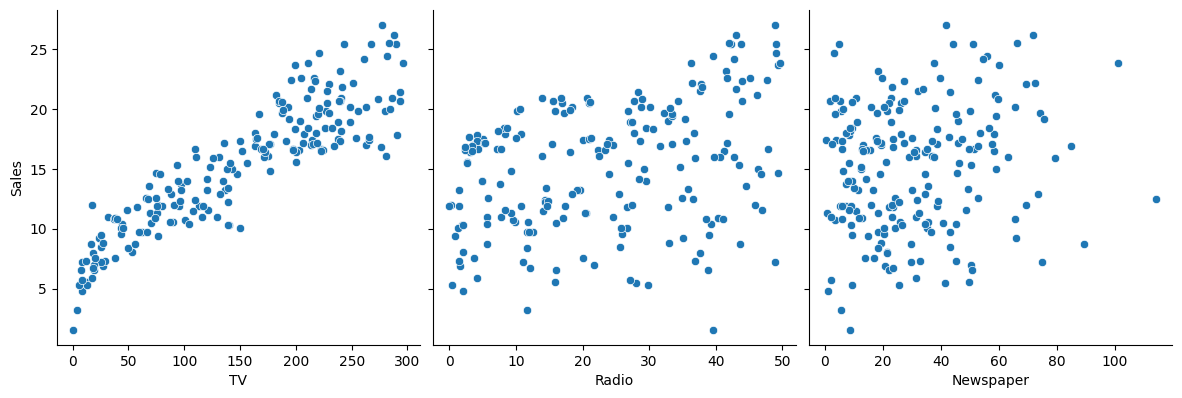

In [8]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'],
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

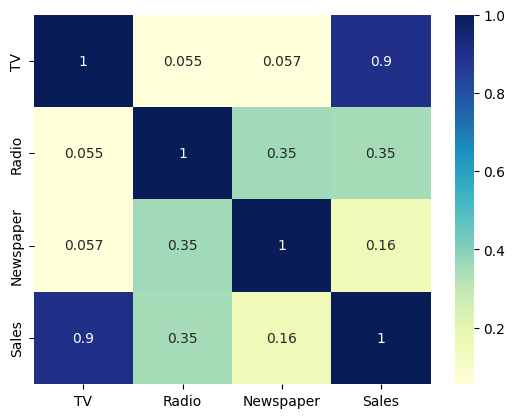

In [9]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
# TV column is corelated with sales linear regression with TV as a feature

In [11]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [12]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [13]:
print(X_train)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64


In [14]:
print(y_train)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64


In [15]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 100)

if we observe the simple linear regression equation y = c + mX, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.

In [16]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [ ]:
X_train_lm

In [18]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [19]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


The straight-line equation we get for the above values is,
Sales = 6.948 + 0.054 * TV

R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

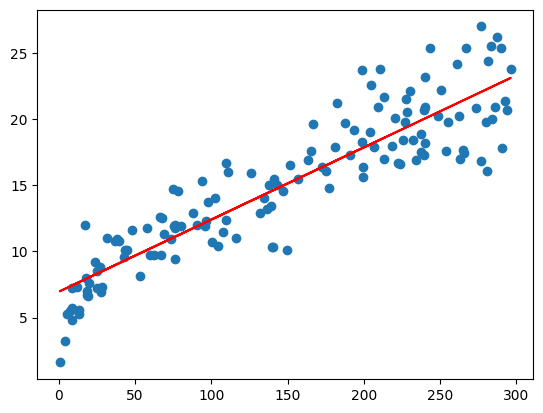

In [31]:
# Visualizing the regression line on training data
y_train_pred = lm.predict(X_train_lm)
plt.scatter(X_train_lm, y_train_lm)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

Residual Analysis
One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

Now from the dataset,
We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [30]:
y_train_pred = lm.predict(X_train_lm)
res = (y_train - y_train_pred)

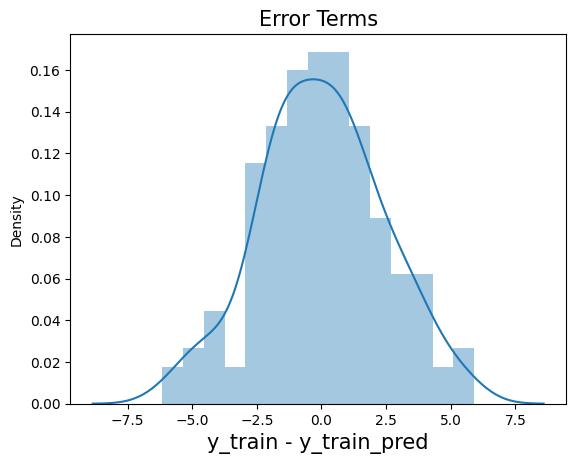

In [26]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

As we can see, the residuals are following the normal distribution graph with a mean 0.

Now, make sure that the residuals are not following any specific pattern.

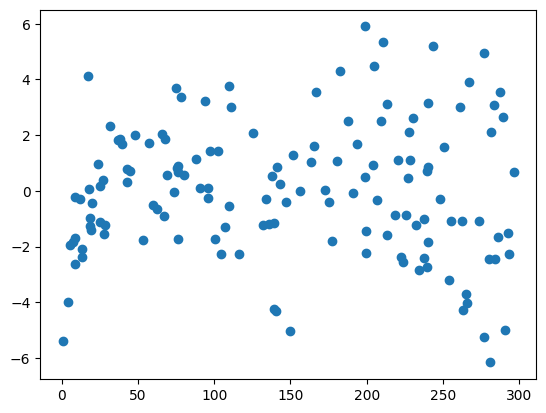

In [27]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

In [21]:
# Importing r2_square
from sklearn.metrics import r2_score

# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred)*100)
print(r2_score(y_test,y_test_pred)*100)

81.57933136480389
79.21031601245662


In [28]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245662

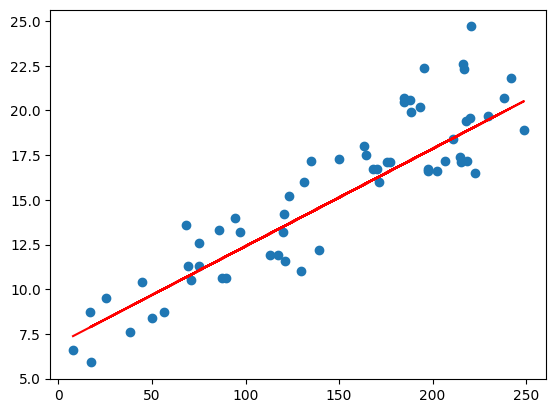

In [29]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()